# Аналитика в авиакомпании

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#График:-модели-самолетов-и-количество-рейсов." data-toc-modified-id="График:-модели-самолетов-и-количество-рейсов.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>График: модели самолетов и количество рейсов.</a></span></li><li><span><a href="#График:-города-и-количество-рейсов." data-toc-modified-id="График:-города-и-количество-рейсов.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>График: города и количество рейсов.</a></span></li><li><span><a href="#График:-топ-10-городов-и-количество-рейсов." data-toc-modified-id="График:-топ-10-городов-и-количество-рейсов.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>График: топ-10 городов и количество рейсов.</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта

Необходимо проанализировать полученные на предыдущих этапах таблицы для компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

## Общая информация о данных

In [1]:
# импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [2]:
# читаем файлы
models = pd.read_csv('/datasets/query_1.csv')
cities = pd.read_csv('/datasets/query_3.csv')

In [3]:
# выводим таблицу раз
display(models)
models.info()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
# выводим таблицу два
display(cities)
cities.info()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Был открыт и изучен файл с предоставленными данными. Типы данных корректны, пропусков нет, работаем дальше.

## Топ-10 городов по количеству рейсов

In [5]:
ten_cities = cities.sort_values(by = 'average_flights', ascending = False)
ten_cities = (ten_cities.head(10))

In [6]:
ten_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


## График: модели самолетов и количество рейсов.

Text(0, 0.5, 'Количество рейсов')

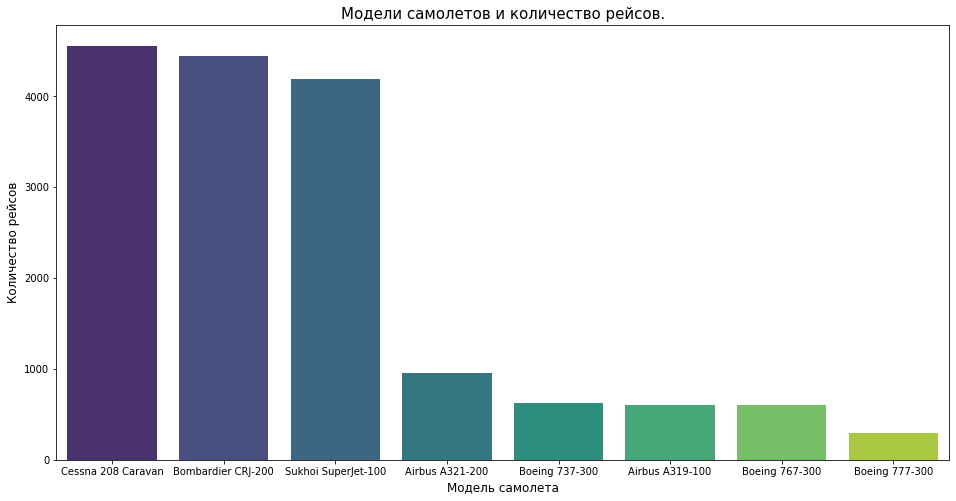

In [7]:
# отрисовываем барплот для полученной таблицы
plt.figure(figsize=(16, 8))
plot_order = models.sort_values(by='flights_amount', ascending=False).model.values
plot = sns.barplot(x = models.model, y = models['flights_amount'], data=models, order=plot_order, palette = 'viridis')
plt.title('Модели самолетов и количество рейсов.', fontsize=15)
plt.xlabel('Модель самолета', fontsize=12)
plt.ylabel('Количество рейсов', fontsize=12)

На основании графика можно судить о том, что самые "часто летающие" модели самолетов - это Cessna 208 Caravan (самолеты вместимостью до 10 пасс. очень востребованы для обслуживания местных линий), Bombardier CRJ-200(этот небольшой 50-местный самолет полностью соответствует потребностям региональных перевозчиков и пассажиров) и Sukhoi SuperJet-100 (лучшее, что на сегодняшний день получилось у отечественного авиапрома(с)).

## График: города и количество рейсов.

Text(0, 0.5, 'Количество рейсов')

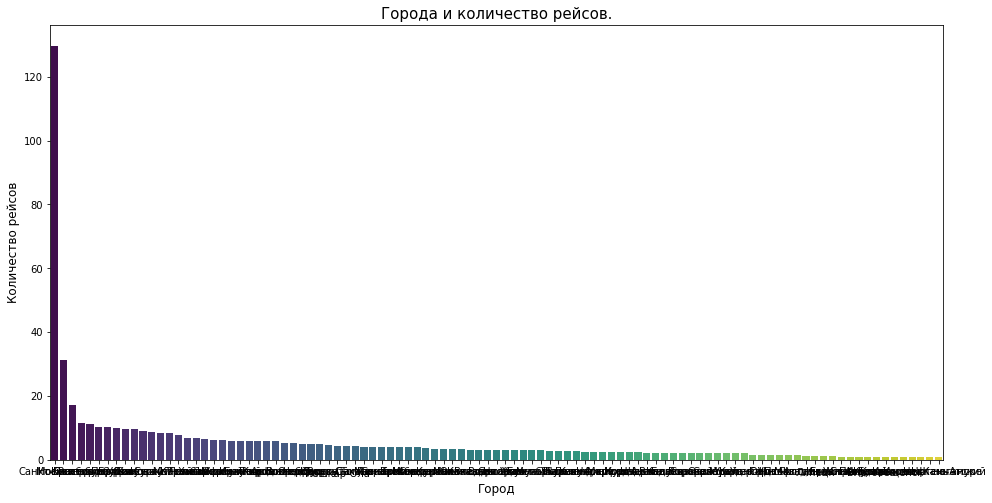

In [8]:
# отрисовываем барплот для полученной таблицы
plt.figure(figsize=(16, 8))
plot_order = cities.sort_values(by='average_flights', ascending=False).city.values
plot = sns.barplot(x = cities.city, y = cities['average_flights'], data=cities, order=plot_order, palette = 'viridis')
plt.title('Города и количество рейсов.', fontsize=15)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество рейсов', fontsize=12)

Прекрасно, но практически ничего не понятно - кроме того, что есть три очевидных лидера.

## График: топ-10 городов и количество рейсов.

Text(0, 0.5, 'Количество рейсов')

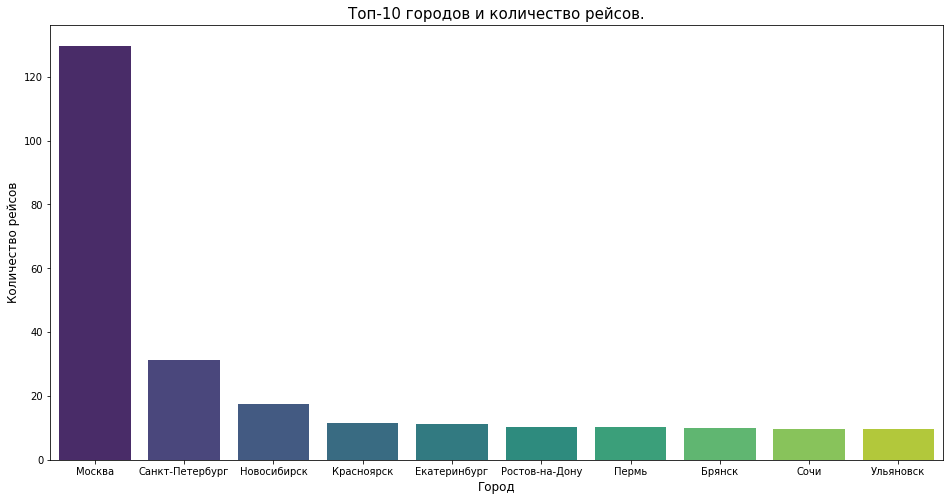

In [9]:
# отрисовываем барплот для полученной таблицы
plt.figure(figsize=(16, 8))
plot_order = ten_cities.sort_values(by='average_flights', ascending=False).city.values
plot = sns.barplot(x = ten_cities.city, y = ten_cities['average_flights'], data=ten_cities, order=plot_order, palette = 'viridis')
plt.title('Топ-10 городов и количество рейсов.', fontsize=15)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Количество рейсов', fontsize=12)

В Москве ожидаемо самый большой поток перелетов - во-первых, это столица и люди сюда летают и по делам, и просто в качестве туристов, во-вторых, здесь 4 аэропорта, в-третьих, все эти аэропрты с очень крупной междугородней и международной развязкой. Санкт-Петербург - второй по популярности город, культурная столица, масса туристов. Новосибирск тоже имеет очень крупную сеть международной развязки (купив авиабилет, из Новосибирска можно напрямую добраться в Бангкок, Камрань, Санью, Гонгконг, Шанхай, Пекин, Сеул, Дубай, Токио, на Пхукет и Фукуок. Продаются авиабилеты и в страны Европы: Германию, Чехию, Грецию, Болгарию, Турцию, на Кипр и в Белоруссию).

## Общий вывод

Были получены и изучены данные об авиаперевозках - самыми популярными моделями самолетов являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. Самые популярные аэропорты-направления находятся в Москве (очевидный лидер), Санкт-Петербурге, Новоибирске. Кроме них в топ-10 входят Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск.